In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
file1 = open("data\hi\hi.txt","r", encoding = "UTF-8", errors = 'ignore')

In [2]:
uni_word = {}
bi_word = {}
tri_word = {}
f = 0

In [3]:
punctuations=["।",";",",",":","!",'"',"?",":-","-","{","(","}",")","_","०","S","―","=","[","]","......",":-",".","॥",'”',"|","�","\xa0"]

In [8]:
while True and f<=20000000:
    line = file1.readline()
    if not line:
        break
    f += 1
    words = line.split()
    i = []
    for idx, word in enumerate(words):
        w = ""
        for char in word:    
            if ord(char) in range(0x0900, 0x097F) and char not in punctuations:
                w += char
        words[idx] = w
        
    c = 0
    bi_win = words[:1]
    tri_win = words[:2]
    for word in words:
        if not word:
            continue
        if word not in uni_word.keys():
            uni_word[word] = 1
        else:
            uni_word[word] += 1

        if c >= 1:
            w = bi_win[0] + " " + word
            if w not in bi_word.keys():
                bi_word[w] = 1
            else:
                bi_word[w] += 1
            bi_win[0] = word

        if c >= 2:
            w = tri_win[0] + " " + tri_win[1] + " " + word
            if w not in tri_word.keys():
                tri_word[w] = 1
            else:
                tri_word[w] += 1
            tri_win[0] = tri_win[1]
            tri_win[1] = word

        c+=1

In [27]:
output = {}
uni_words = sorted(uni_word.items(), key = lambda x: x[1], reverse=True)[:100]
bi_words = sorted(bi_word.items(), key = lambda x: x[1], reverse=True)[:100]
tri_words = sorted(tri_word.items(), key = lambda x: x[1], reverse=True)[:100]
output["uni_words"] = [i[0] for i in uni_words]
uni_count = [i[1] for i in uni_words]
output["bi_words"] = [i[0] for i in bi_words]
bi_count = [i[1] for i in bi_words]
output["tri_words"] = [i[0] for i in tri_words]
tri_count = [i[1] for i in tri_words]

In [28]:
data = pd.DataFrame(output)

In [29]:
data.to_csv('Top_Words.txt', index = False)

Text(0, 0.5, 'Frequency')

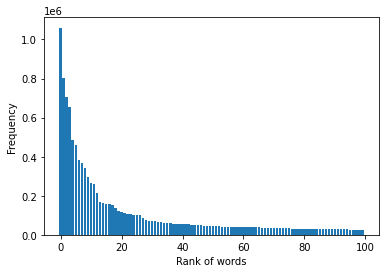

In [36]:
plt.bar([i for i in range(100)], uni_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

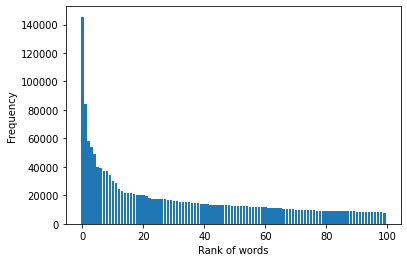

In [37]:
plt.bar([i for i in range(100)], bi_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

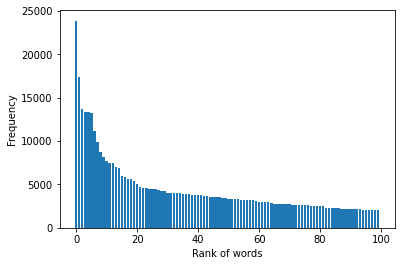

In [38]:
plt.bar([i for i in range(100)], tri_count)
plt.xlabel("Rank of words")
plt.ylabel("Frequency")